# ENCODE bigWig analysis questions

Do your best to answer all parts of each question. You are encouraged to work in pairs. 

Answers to many questions may benefit from using more than one cell, as well as a combination of markdown and code cells.

Put helper functions into a separate script (e.g. `hwutils.py`) so they can be commented on easily and focus the notebook on plotting. Also see the [workshop on Clean Code](https://drive.google.com/file/d/1TraVwRkbkCbHq-s_-NS69ZEbRNwH8XNh/view) from Dan Larremore (https://larremorelab.github.io/slides/) for good coding tips to use in this assignment.


In [1]:
# useful libraries to import
import sys

import pandas as pd
import numpy as np

import  sklearn.decomposition

import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b') 
# nice way to format ticks as human-readable: ax.xaxis.set_major_formatter(bp_formatter)
import seaborn as sns;sns.set()

from hwutils import *

In [2]:
# load dataFrame of bigWigs from ENCODE (encodeproject.org/), binned to 10kb resolution across chromosome 10.
# note that the first three columns are chrom,start,end and the other columns are labeled by bigWig file accession.
df = pd.read_table('./data/ENCODE_GRCh38_binned_subset.tsv')

# load metadata from ENCODE for bigwig files. 
# can be queried as follows: bigwig_metadata.query("`File accession`==@ df_column_name ")
bigwig_metadata = pd.read_table('./data/ENCODE_GRCh38_bigWig_metadata.tsv')

/var/folders/gh/zry_3rmd11d1swl00yzmgbq80000gn/T/ipykernel_77055/1708817607.py:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  bigwig_metadata = pd.read_table('./data/ENCODE_GRCh38_bigWig_metadata.tsv')


In [3]:
df.head()

,chrom,start,end,ENCFF230YBR,ENCFF953CVO,ENCFF520IHF,ENCFF730SPR,ENCFF559YWA,ENCFF640PJT,ENCFF919FBG,...,ENCFF418EBS,ENCFF270BHF,ENCFF365EIN,ENCFF321AHD,ENCFF595QZS,ENCFF303MWS,ENCFF907FVJ,ENCFF567WCU,ENCFF423TVA,ENCFF308KWQ
0,chr10,0,10000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,chr10,10000,20000,0.016585,0.141369,0.000000,0.092070,0.048068,0.006080,0.029362,...,0.074162,0.033137,0.105691,0.000000,0.000000,0.045821,0.034791,0.000000,0.000000,0.0
2,chr10,20000,30000,0.000000,0.000000,0.000000,0.041850,0.010681,0.000000,0.000000,...,0.018541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,chr10,30000,40000,0.000000,0.023561,0.000000,0.008370,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,chr10,40000,50000,0.049756,0.094244,0.052176,0.442616,0.181287,0.009625,0.142758,...,0.055622,0.234655,0.156918,0.072464,0.028221,0.274925,0.138100,0.025495,0.073522,0.0


In [4]:
bigwig_metadata.head()

,Unnamed: 0,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Donor(s),...,Genome annotation,Platform,Controlled by,File Status,s3_uri,File analysis title,File analysis status,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR
0,38,ENCFF298EKM,bigWig,bigWig,NaN,signal p-value,GRCh38,ENCSR000ANO,TF ChIP-seq,/human-donors/ENCDO156MSV/,...,NaN,NaN,NaN,released,s3://encode-public/2017/02/07/7220c4f7-ab3a-43...,ENCODE3 GRCh38,archived,"borderline replicate concordance, low read dep...","severe bottlenecking, poor library complexity","extremely low read depth, missing control alig..."
1,39,ENCFF599PYU,bigWig,bigWig,NaN,signal p-value,GRCh38,ENCSR000ANO,TF ChIP-seq,/human-donors/ENCDO269AAA/,...,NaN,NaN,NaN,released,s3://encode-public/2017/02/07/27c489a3-e834-45...,ENCODE3 GRCh38,archived,"borderline replicate concordance, low read dep...","severe bottlenecking, poor library complexity","extremely low read depth, missing control alig..."
2,40,ENCFF393FQJ,bigWig,bigWig,NaN,signal p-value,GRCh38,ENCSR000ANO,TF ChIP-seq,"/human-donors/ENCDO156MSV/, /human-donors/ENCD...",...,NaN,NaN,NaN,released,s3://encode-public/2017/02/07/86f9d2fb-ca91-40...,ENCODE3 GRCh38,archived,"borderline replicate concordance, low read dep...","severe bottlenecking, poor library complexity","extremely low read depth, missing control alig..."
3,41,ENCFF528ORD,bigWig,bigWig,NaN,fold change over control,GRCh38,ENCSR000ANO,TF ChIP-seq,/human-donors/ENCDO269AAA/,...,NaN,NaN,NaN,released,s3://encode-public/2017/02/07/26e29d25-4dae-47...,ENCODE3 GRCh38,archived,"borderline replicate concordance, low read dep...","severe bottlenecking, poor library complexity","extremely low read depth, missing control alig..."
4,42,ENCFF911FWI,bigWig,bigWig,NaN,fold change over control,GRCh38,ENCSR000ANO,TF ChIP-seq,"/human-donors/ENCDO156MSV/, /human-donors/ENCD...",...,NaN,NaN,NaN,released,s3://encode-public/2017/02/07/450bbbc3-d0ba-45...,ENCODE3 GRCh38,archived,"borderline replicate concordance, low read dep...","severe bottlenecking, poor library complexity","extremely low read depth, missing control alig..."


**1. After loading the data (above), and visualize some of the profiles. Why might many signals dip on chr10 at around 40Mb?**


Text(0, 0.5, 'ENCFF230YBR')

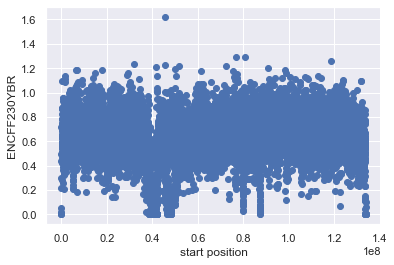

In [5]:
plt.scatter(df.start, df.ENCFF230YBR) 
plt.xlabel('start position')
plt.ylabel('ENCFF230YBR')

# prominent dip at around 0.4

Text(0, 0.5, 'ENCFF953CVO')

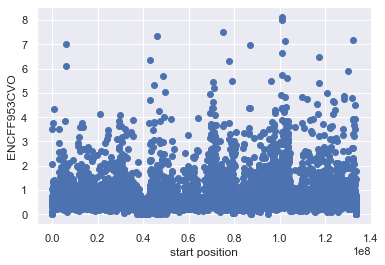

In [6]:
plt.scatter(df.start, df.ENCFF953CVO) 
plt.xlabel('start position')
plt.ylabel('ENCFF953CVO')

Text(0, 0.5, 'ENCFF520IHF')

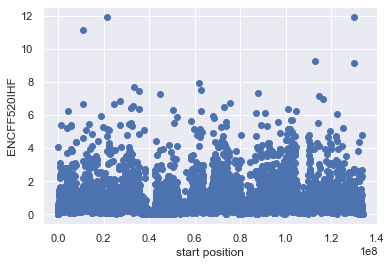

In [7]:
plt.scatter(df.start, df.ENCFF520IHF) 
plt.xlabel('start position')
plt.ylabel('ENCFF520IHF')

Text(0, 0.5, 'ENCFF520IHF')

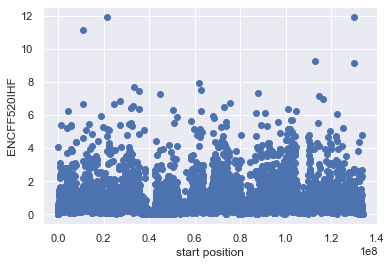

In [8]:
plt.scatter(df.start, df.ENCFF520IHF) 
plt.xlabel('start position')
plt.ylabel('ENCFF520IHF')

#### Q1 Answer: 
In each of these plots we can see a dip at around 40Mb. This could be an indicator that the centromer is located at approximately 40Mb. After looking this up (https://en.wikipedia.org/wiki/Chromosome_10), we see that the centromere's position in chromosome 10 is indeed at 39.8 Mbp, explaining the dip in signal.

**2. Use scikit-learn to perform PCA, and make a scatterplot of PC1 vs PC2.**


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x=df.iloc[:,3:]
pca.fit(x)

PCA(n_components=2)

In [10]:
X_pca = pca.transform(x)

In [11]:
projected = pca.fit_transform(x)
print(projected.shape)

(13380, 2)


In [12]:
projected

array([[-6.42601071,  2.35383458],
       [-5.79046691,  0.96736623],
       [-6.39276725,  2.31721043],
       ...,
       [-6.37280604,  2.29270994],
       [-5.90305078,  1.6962529 ],
       [-6.42742404,  2.35377608]])

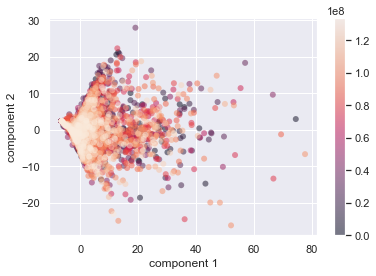

In [13]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=df.start, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

**3. Try to use the experiment metadata to understand and remove outliers. Try labeling or coloring points by various metadata columns. Were any columns in the metadata useful for outlier removal? Note that `sklearn.preprocessing.LabelEncoder()` can be useful for transforming text strings to categories, and `plt.text` can be used to overlay labels with points.**

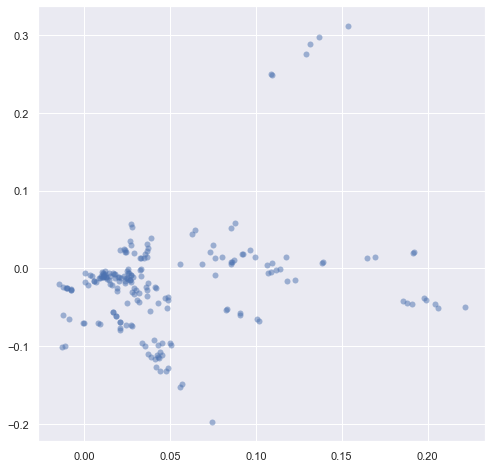

In [14]:
plot_pca(pca,bigwig_metadata=bigwig_metadata)

In [15]:
# Column names for reference
bigwig_metadata.columns

Index(['Unnamed: 0', 'File accession', 'File format', 'File type',
       'File format type', 'Output type', 'File assembly',
       'Experiment accession', 'Assay', 'Donor(s)', 'Biosample term id',
       'Biosample term name', 'Biosample type', 'Biosample organism',
       'Biosample treatments', 'Biosample treatments amount',
       'Biosample treatments duration',
       'Biosample genetic modifications methods',
       'Biosample genetic modifications categories',
       'Biosample genetic modifications targets',
       'Biosample genetic modifications gene targets',
       'Biosample genetic modifications site coordinates',
       'Biosample genetic modifications zygosity', 'Experiment target',
       'Library made from', 'Library depleted in', 'Library extraction method',
       'Library lysis method', 'Library crosslinking method',
       'Library strand specific', 'Experiment date released', 'Project',
       'RBNS protein concentration', 'Library fragmentation method',
      

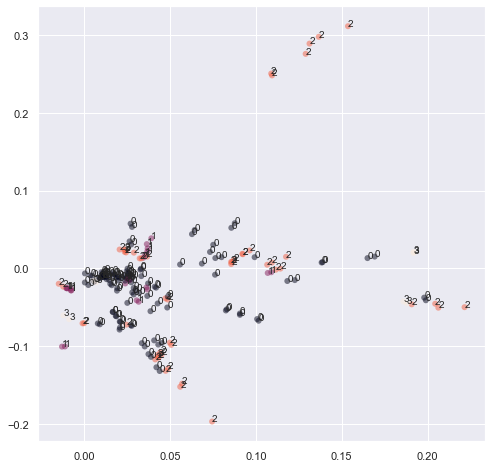

In [16]:
plot_pca(pca,bigwig_metadata=bigwig_metadata,metadata_label_column="Biosample type")

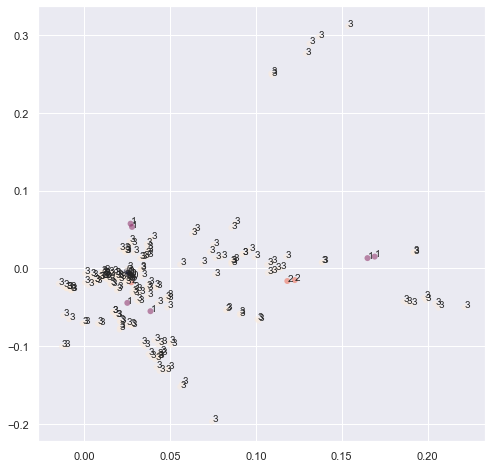

In [17]:
plot_pca(pca,bigwig_metadata=bigwig_metadata,metadata_label_column="Biosample treatments")

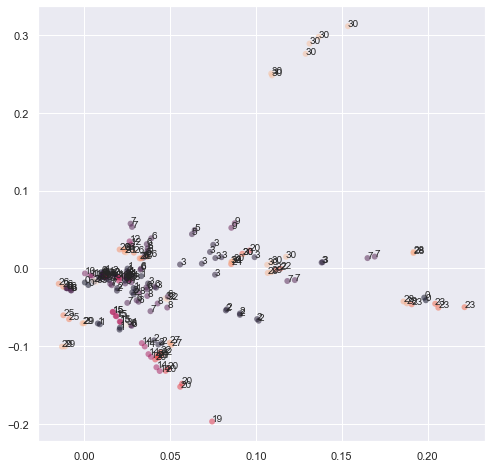

In [18]:
plot_pca(pca,bigwig_metadata=bigwig_metadata,metadata_label_column="Donor(s)")

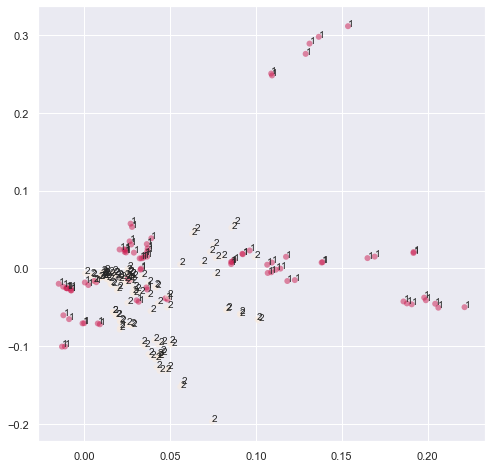

In [19]:
plot_pca(pca,bigwig_metadata=bigwig_metadata,metadata_label_column="Assay")

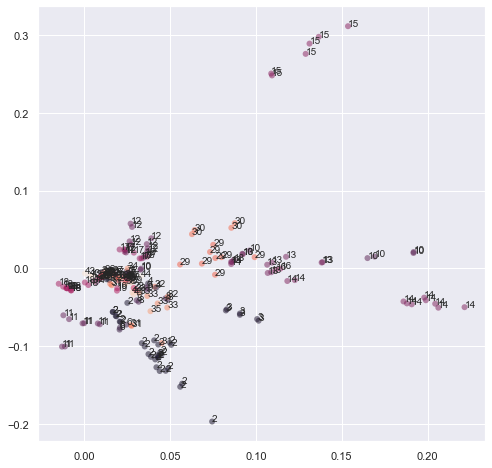

In [20]:
plot_pca(pca,bigwig_metadata=bigwig_metadata,metadata_label_column="Experiment target")

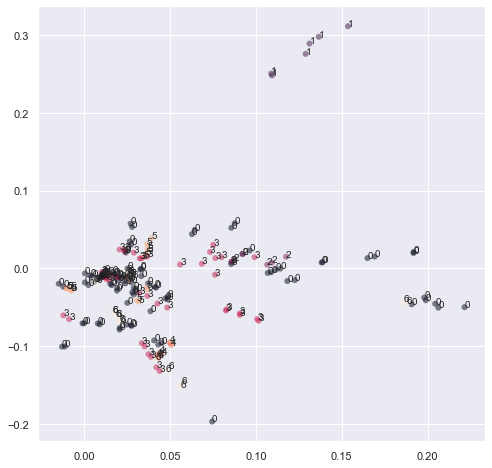

In [21]:
plot_pca(pca,bigwig_metadata=bigwig_metadata,metadata_label_column="Audit ERROR")

#### Answer:


**4. Which Assays or Experiment Targets show broad vs narrow patterns? Is this consistent across cell types? Does this relate to the patterns seen in PCA? One way to investigate the characteristic scale is by computing the autocorrelation.**


In [22]:
df.columns[3:]

Index(['ENCFF230YBR', 'ENCFF953CVO', 'ENCFF520IHF', 'ENCFF730SPR',
       'ENCFF559YWA', 'ENCFF640PJT', 'ENCFF919FBG', 'ENCFF141QAK',
       'ENCFF941KEV', 'ENCFF589QXD',
       ...
       'ENCFF418EBS', 'ENCFF270BHF', 'ENCFF365EIN', 'ENCFF321AHD',
       'ENCFF595QZS', 'ENCFF303MWS', 'ENCFF907FVJ', 'ENCFF567WCU',
       'ENCFF423TVA', 'ENCFF308KWQ'],
      dtype='object', length=200)

In [23]:
#filter out items in metadata that are not in df
filtered_bigwig_metadata=bigwig_metadata[bigwig_metadata["File accession"].isin(df.columns[3:])]

In [24]:
filtered_bigwig_metadata["Assay"].unique()

array(['TF ChIP-seq', 'Histone ChIP-seq', 'ATAC-seq'], dtype=object)

## TF ChIP-seq

In [25]:
#get chipseq experiments
tfchipseq=filtered_bigwig_metadata.loc[(filtered_bigwig_metadata["Assay"]=="TF ChIP-seq")]
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_rows', 500)
tfchipseq[['File accession','Biosample term name']]

,File accession,Biosample term name
3,ENCFF528ORD,fibroblast of lung
4,ENCFF911FWI,fibroblast of lung
5,ENCFF567WCU,fibroblast of lung
7,ENCFF303ENB,fibroblast of lung
8,ENCFF953CVO,fibroblast of lung
11,ENCFF616VTY,fibroblast of lung
37,ENCFF896GKF,K562
43,ENCFF601YEO,K562
77,ENCFF107LDM,GM12878
81,ENCFF696PUH,GM12878


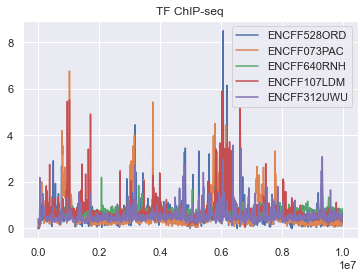

In [26]:
plt.plot(df[1:1000].start, df[1:1000].ENCFF528ORD,label = "ENCFF528ORD") 
plt.plot(df[1:1000].start, df[1:1000].ENCFF073PAC,label = "ENCFF073PAC") 
plt.plot(df[1:1000].start, df[1:1000].ENCFF640RNH,label = "ENCFF640RNH")
plt.plot(df[1:1000].start, df[1:1000].ENCFF107LDM,label = "ENCFF107LDM") 
plt.plot(df[1:1000].start, df[1:1000].ENCFF312UWU,label = "ENCFF312UWU") 
plt.legend()
plt.title("TF ChIP-seq")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


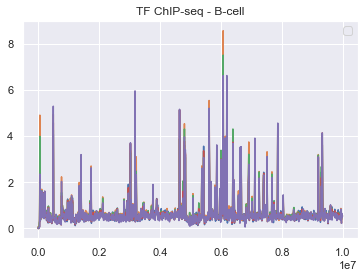

In [27]:
plt.plot(df[1:1000].start, df[1:1000].ENCFF773THK) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF418EBS) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF035DJL)
plt.plot(df[1:1000].start, df[1:1000].ENCFF031CXE) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF156RFW) 
plt.legend()
plt.title("TF ChIP-seq - B-cell")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


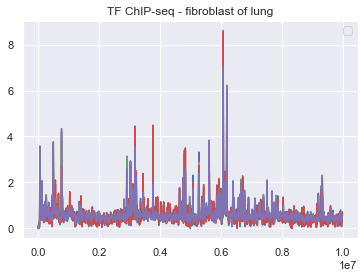

In [28]:
plt.plot(df[1:1000].start, df[1:1000].ENCFF528ORD) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF911FWI) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF567WCU)
plt.plot(df[1:1000].start, df[1:1000].ENCFF303ENB) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF953CVO) 
plt.legend()
plt.title("TF ChIP-seq - fibroblast of lung")
plt.show()

## Histone ChIP-seq

In [29]:
#get histone chipseq experiments
histonechipseq = filtered_bigwig_metadata[filtered_bigwig_metadata['Assay'] == 'Histone ChIP-seq']
histonechipseq[['File accession','Biosample term name']]

,File accession,Biosample term name
13,ENCFF781ZDY,B cell
21,ENCFF696PMM,B cell
53,ENCFF520IHF,myotube
55,ENCFF195GEW,myotube
62,ENCFF429ZOO,fibroblast of dermis
64,ENCFF171XAI,fibroblast of dermis
65,ENCFF315VTD,fibroblast of dermis
67,ENCFF861SNZ,fibroblast of dermis
70,ENCFF136EQS,fibroblast of dermis
71,ENCFF872KBA,fibroblast of dermis


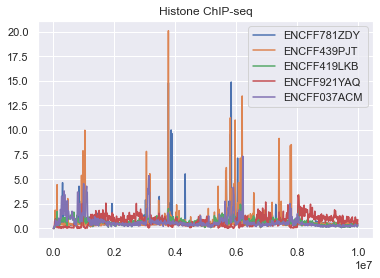

In [30]:
plt.plot(df[1:1000].start, df[1:1000].ENCFF781ZDY,label = "ENCFF781ZDY") 
plt.plot(df[1:1000].start, df[1:1000].ENCFF439PJT,label = "ENCFF439PJT") 
plt.plot(df[1:1000].start, df[1:1000].ENCFF419LKB,label = "ENCFF419LKB") 
plt.plot(df[1:1000].start, df[1:1000].ENCFF921YAQ,label = "ENCFF921YAQ") 
plt.plot(df[1:1000].start, df[1:1000].ENCFF037ACM,label = "ENCFF037ACM") 
plt.legend()
plt.title("Histone ChIP-seq")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


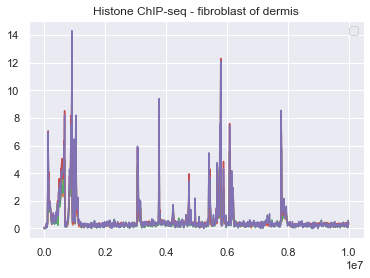

In [31]:
plt.plot(df[1:1000].start, df[1:1000].ENCFF429ZOO) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF171XAI) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF315VTD)
plt.plot(df[1:1000].start, df[1:1000].ENCFF861SNZ) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF872KBA) 
plt.legend()
plt.title("Histone ChIP-seq - fibroblast of dermis")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


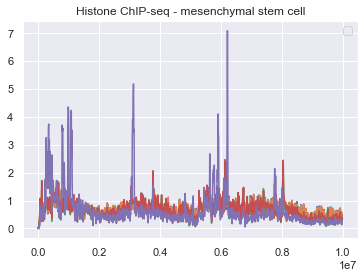

In [32]:
plt.plot(df[1:1000].start, df[1:1000].ENCFF096QYY) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF270BHF) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF419LKB)
plt.plot(df[1:1000].start, df[1:1000].ENCFF730DGP) 
plt.plot(df[1:1000].start, df[1:1000].ENCFF278HYJ) 
plt.legend()
plt.title("Histone ChIP-seq - mesenchymal stem cell")
plt.show()

In [33]:
#get histone chipseq experiments
atacseq = filtered_bigwig_metadata[filtered_bigwig_metadata['Assay'] == 'ATAC-seq']
atacseq['File accession'].tolist()

['ENCFF890LTR']

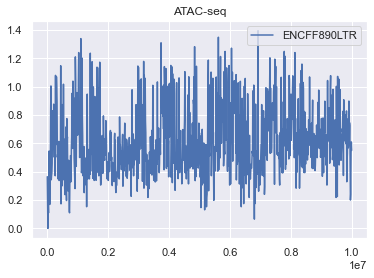

In [34]:
plt.plot(df[1:1000].start, df[1:1000].ENCFF890LTR,label = "ENCFF890LTR") 
plt.legend()
plt.title("ATAC-seq")
plt.show()

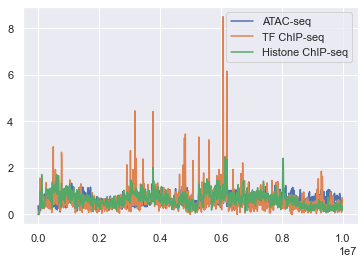

In [35]:
plt.plot(df[1:1000].start, df[1:1000].ENCFF890LTR,label = "ATAC-seq") 
plt.plot(df[1:1000].start, df[1:1000].ENCFF528ORD,label = "TF ChIP-seq") 
plt.plot(df[1:1000].start, df[1:1000].ENCFF419LKB,label = "Histone ChIP-seq")
plt.legend()
plt.show()

#### Answer:
**Which Assays or Experiment Targets show broad vs narrow patterns?**
Looking at the different Assays we can see that Histone ChIP-seq has broader patterns than TF ChIP-seq. We only have one sample for ATAC-seq so we cannot say anything about that Assay.

**Is this consistent across cell types?**
When we looked at differnet cell types within Assays we observed that the patterns were very similar for both Histone ChIP-seq and TF ChIP-seq, so it seems to be consistent across cell types.

**Does this relate to the patterns seen in PCA? One way to investigate the characteristic scale is by computing the autocorrelation.**
If we look at the PCA labaled by Assay the Histone ChIP-seq is not as concentrated in one place which makes sense looking at the broader pattern it displays in signal to  

**5. Which "Experiment Targets" (e.g. histone marks or transcription factors) for which cell types are nearby in this PC1 vs PC2 space? Do any of these proximities have plausible biological interpretations? For example, are any polycomb-related factors in proximity? Illustrate this in a plot.**


In [36]:
bigwig_metadata.head()

,Unnamed: 0,File accession,File format,File type,File format type,Output type,File assembly,Experiment accession,Assay,Donor(s),...,Genome annotation,Platform,Controlled by,File Status,s3_uri,File analysis title,File analysis status,Audit WARNING,Audit NOT_COMPLIANT,Audit ERROR
0,38,ENCFF298EKM,bigWig,bigWig,NaN,signal p-value,GRCh38,ENCSR000ANO,TF ChIP-seq,/human-donors/ENCDO156MSV/,...,NaN,NaN,NaN,released,s3://encode-public/2017/02/07/7220c4f7-ab3a-43...,ENCODE3 GRCh38,archived,"borderline replicate concordance, low read dep...","severe bottlenecking, poor library complexity","extremely low read depth, missing control alig..."
1,39,ENCFF599PYU,bigWig,bigWig,NaN,signal p-value,GRCh38,ENCSR000ANO,TF ChIP-seq,/human-donors/ENCDO269AAA/,...,NaN,NaN,NaN,released,s3://encode-public/2017/02/07/27c489a3-e834-45...,ENCODE3 GRCh38,archived,"borderline replicate concordance, low read dep...","severe bottlenecking, poor library complexity","extremely low read depth, missing control alig..."
2,40,ENCFF393FQJ,bigWig,bigWig,NaN,signal p-value,GRCh38,ENCSR000ANO,TF ChIP-seq,"/human-donors/ENCDO156MSV/, /human-donors/ENCD...",...,NaN,NaN,NaN,released,s3://encode-public/2017/02/07/86f9d2fb-ca91-40...,ENCODE3 GRCh38,archived,"borderline replicate concordance, low read dep...","severe bottlenecking, poor library complexity","extremely low read depth, missing control alig..."
3,41,ENCFF528ORD,bigWig,bigWig,NaN,fold change over control,GRCh38,ENCSR000ANO,TF ChIP-seq,/human-donors/ENCDO269AAA/,...,NaN,NaN,NaN,released,s3://encode-public/2017/02/07/26e29d25-4dae-47...,ENCODE3 GRCh38,archived,"borderline replicate concordance, low read dep...","severe bottlenecking, poor library complexity","extremely low read depth, missing control alig..."
4,42,ENCFF911FWI,bigWig,bigWig,NaN,fold change over control,GRCh38,ENCSR000ANO,TF ChIP-seq,"/human-donors/ENCDO156MSV/, /human-donors/ENCD...",...,NaN,NaN,NaN,released,s3://encode-public/2017/02/07/450bbbc3-d0ba-45...,ENCODE3 GRCh38,archived,"borderline replicate concordance, low read dep...","severe bottlenecking, poor library complexity","extremely low read depth, missing control alig..."


In [37]:
#Adding a new column that combines experiment targets and cell type in the filtered_bigwig_metadata
filtered_bigwig_metadata["cell_type_target"] = filtered_bigwig_metadata["Biosample term name"].astype(str) +"-"+ filtered_bigwig_metadata["Experiment target"]

/var/folders/gh/zry_3rmd11d1swl00yzmgbq80000gn/T/ipykernel_77055/1541771111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bigwig_metadata["cell_type_target"] = filtered_bigwig_metadata["Biosample term name"].astype(str) +"-"+ filtered_bigwig_metadata["Experiment target"]


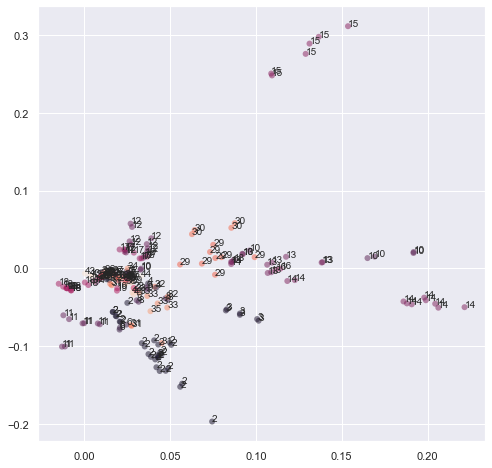

In [38]:
plot_pca(pca,bigwig_metadata=bigwig_metadata,metadata_label_column="Experiment target")

**6. How much does preprocessing matter? Try normalizing the variance per track and see if you arrive at similar or distinct conclusions. Try removing the region on chr10 mentioned above. Note that `sklearn.preprocessing.StandardScaler` could be useful for preprocessing.**


In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [40]:
scale_x=scaler.transform(x)

In [41]:
scale_projected = scaler.fit_transform(x)
print(scale_projected.shape)

(13380, 200)


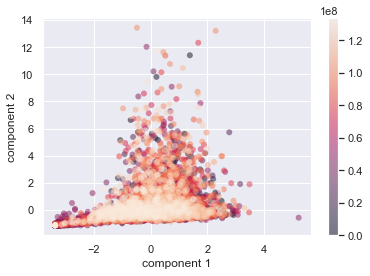

In [42]:
plt.scatter(scale_projected[:, 0], scale_projected[:, 1],
            c=df.start, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [43]:
from pandas import DataFrame
normalized_df=DataFrame(scale_projected)

In [44]:
normalized_df.columns = x.columns

In [45]:
normalized_df["start"]=df.start
normalized_df["end"]=df.end

Text(0, 0.5, 'ENCFF230YBR')

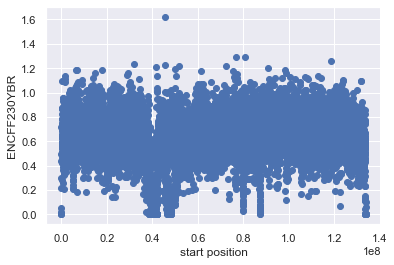

In [46]:
plt.scatter(df.start, df.ENCFF230YBR) 
plt.xlabel('start position')
plt.ylabel('ENCFF230YBR')

Text(0, 0.5, 'ENCFF230YBR')

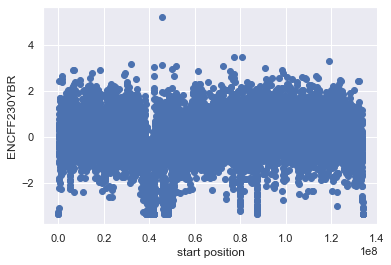

In [47]:
plt.scatter(normalized_df.start, normalized_df.ENCFF230YBR) 
plt.xlabel('start position')
plt.ylabel('ENCFF230YBR')


**7. How many PCs are needed to explain 90% of the variance in the data? Illustrate this with a scree plot (https://en.wikipedia.org/wiki/Scree_plot).**


In [48]:
from sklearn.decomposition import PCA
pca = PCA()
x=df.iloc[:,3:]
x_pca = pca.fit_transform(x)

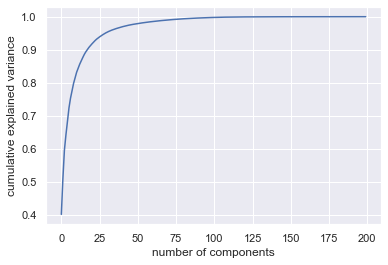

In [49]:
# Method from class
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [50]:
## Check which index+1 contains value closest to 90%
df1 = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_))
df1
# 18 PC's needed to explain 90%

,0
0,0.401373
1,0.508076
2,0.595348
3,0.642062
4,0.684553
5,0.724017
6,0.753320
7,0.775873
8,0.798082
9,0.815327


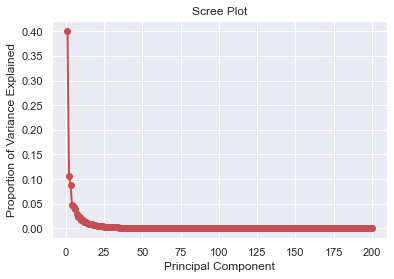

In [51]:
# Let's do this more elegantly with a scree plot

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [52]:
# Check that 18 PC's explain 90% 
exp_var = pca.explained_variance_ratio_

sum = 0
for i in range(0,18):
    sum+=exp_var[i]
    
sum

#Confirmed, YAY!

0.900420105321143

#### Q7 Answer: 

You can see with both the line plot and the scree plot that 18 PC's are needed to acheive 90% variance.

**8. How different is the dimensionality reduction into two dimensions for PCA from that obtained using MDS (multi-dimensional scaling)? What methods could be used to determine the similarity? Illustrate with a plot.**


In [53]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(x)

KeyboardInterrupt: 

**9. Would non-negative matrix factorization (https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) be a useful method to use for this dataset? Why or why not?  (No plots needed for this question).**


#### Q9 Answer:

We think NMF would be useful for this data set. Using PCA on our data doesn't give us good clustering. This may be due to the complexity of our data. Furthermore, PCA is best for linearly separable data.

NMF is also useful in finding the experiments most representative of the clusters. This is because NMF leads to zeros for factors that don’t contribute.